In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Defining the constants:

In [495]:
# defining constants

DATASET_PATH = 'keypoint.csv'
MODEL_PATH = 'model/keypoint_classifier.hdf5'
MODEL_PATH_TFLITE = 'model/keypoint_classifier.tflite'
RANDOM_SEED = 41
NUM_CLASSES = 3

### Reading the dataset:

In [459]:
# read dataset file
ds_dataframe = pd.read_csv(DATASET_PATH, header=None)

# leave the first column and take the rest of the columns
# each pair of column represents (x, y) coordinate of one point
# there are total 21 points, therefore 42 columns
x_df = ds_dataframe.iloc[:, 1:43]

# select the first column as true labels
y_df = ds_dataframe.iloc[:, :1]

### Split the dataset into train and test set:

In [460]:
# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.75, random_state=RANDOM_SEED)

### Create and train the classification model:

In [461]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [462]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_42 (Dropout)        (None, 42)                0         
                                                                 
 dense_63 (Dense)            (None, 20)                860       
                                                                 
 dropout_43 (Dropout)        (None, 20)                0         
                                                                 
 dense_64 (Dense)            (None, 10)                210       
                                                                 
 dense_65 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1103 (4.31 KB)
Trainable params: 1103 (4.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [463]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    MODEL_PATH, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [464]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [465]:
# fit the model of train set
model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 2s - loss: 1.1892 - accuracy: 0.2500
Epoch 1: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 8ms/step - loss: 1.1143 - accuracy: 0.3587 - val_loss: 1.0651 - val_accuracy: 0.5924
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0786 - accuracy: 0.4062
Epoch 2: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4638 - val_loss: 1.0495 - val_accuracy: 0.4801
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0302 - accuracy: 0.5156
Epoch 3: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 1.0494 - accuracy: 0.5048 - val_loss: 1.0326 - val_accuracy: 0.4746
Epoch 4/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0156 - accuracy: 0.5312
Epoch 4: saving model to model/keypoint_classifier.hdf5
13/13

/Users/anand.kumar/dev/hand-gesture-recognition/env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 3ms/step - loss: 1.0010 - accuracy: 0.5386 - val_loss: 0.9472 - val_accuracy: 0.6159
Epoch 8/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9605 - accuracy: 0.5938
Epoch 8: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.5399 - val_loss: 0.9217 - val_accuracy: 0.6395
Epoch 9/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9616 - accuracy: 0.5547
Epoch 9: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.9748 - accuracy: 0.5465 - val_loss: 0.9009 - val_accuracy: 0.7011
Epoch 10/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.9652 - accuracy: 0.5625
Epoch 10: saving model to model/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.9581 - accuracy: 0.5640 - val_loss: 0.8803 - val_accuracy: 0.7120
Epoch 11/1000
 1/13 [=>...

In [466]:
# Model evaluation
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

5/5 [==============================] - 0s 826us/step - loss: 0.3759 - accuracy: 0.9149


In [467]:
# Loading the saved model
model = tf.keras.models.load_model(MODEL_PATH)

In [468]:
# Inference test
predict_result = model.predict(np.array([x_test.iloc[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 27ms/step
[0.11958781 0.11232729 0.7680848 ]
2


In [493]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

18/18 [==============================] - 0s 493us/step


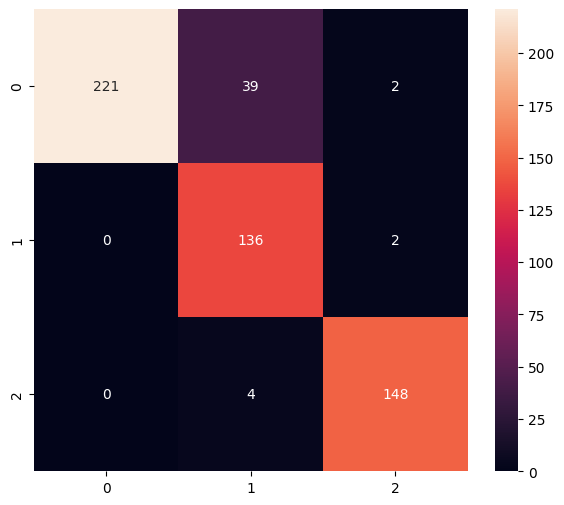

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       262
           1       0.76      0.99      0.86       138
           2       0.97      0.97      0.97       152

    accuracy                           0.91       552
   macro avg       0.91      0.93      0.92       552
weighted avg       0.93      0.91      0.92       552



In [494]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
print_confusion_matrix(y_test.iloc[:, 0], y_pred)


From the confusion matrix above, we can see that the model wrongly predicts the closed state as open state 39 times. This can be minimized by adding more data into the dataset and adding more layers to the network.

In [471]:
# Save as a model dedicated to inference
model.save(MODEL_PATH, include_optimizer=False)

/Users/anand.kumar/dev/hand-gesture-recognition/env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Convert the model to TF Lite:

In [472]:
# convert the model to tf lite model so that inference can be quick
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(MODEL_PATH_TFLITE, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/vq/0gskd40d20774c9069lxvsqr0000gn/T/tmpfgkywkzq/assets


INFO:tensorflow:Assets written to: /var/folders/vq/0gskd40d20774c9069lxvsqr0000gn/T/tmpfgkywkzq/assets
2023-06-30 22:01:02.615767: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-30 22:01:02.615779: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-30 22:01:02.616042: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/vq/0gskd40d20774c9069lxvsqr0000gn/T/tmpfgkywkzq
2023-06-30 22:01:02.617144: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-06-30 22:01:02.617150: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/vq/0gskd40d20774c9069lxvsqr0000gn/T/tmpfgkywkzq
2023-06-30 22:01:02.619496: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-30 22:01:02.649354: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6584

### Infer from the TF Lite Model

In [473]:
interpreter = tf.lite.Interpreter(model_path=MODEL_PATH_TFLITE)
interpreter.allocate_tensors()

In [474]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [475]:
interpreter.set_tensor(input_details[0]['index'], np.float32([x_test.iloc[0]]))

In [476]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 35 µs, sys: 11 µs, total: 46 µs
Wall time: 62.9 µs


In [477]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.11958781 0.11232732 0.7680848 ]
2
